# Analyzing Top Football Transfers from 2000 to 2018

#### Description
The dataset of top expensive football transfers from season 2000-2001 until 2018-2019. The dataset is created on 1 August 2018 and for that reason may have an incomplete list of the latest transfer window(Summer 2018)

#### Dataset:
There are 4700 total rows and 10 columns in this dataset. The columns contain the following information: the name of a football player, selling team and league, the league and team where a player is sold, an estimated market value of a player, an actual value of a transfer, the position of a player and season when a transfer took place.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
transfers = pd.read_csv("top250-00-19.csv")

transfers.info()
transfers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null object
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NaN,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NaN,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,NaN,23000000


## Cleaning the data (updating last 3 columns and sorting the table)

Firstly, let's see the number of rows that has a NaN value in the Market_value column.

In [3]:
transfers["Market_value"].isnull().sum()

1260

1260 out of 4700 rows have null values, so since this number is quite big, and since we are going to do some comparsions between this and transfer_fee column which has all the values present, it would be better to get rid of all the null values.

In [4]:
transfers = transfers.dropna(axis=0, subset=['Market_value'])

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.options.display.float_format = '{:,.2f}'.format

#it's just for viewiing the numbers in the proper format
#Note that .set_option() changes behavior globaly in Jupyter Notebooks, so it is not a temporary fix.
#In order to revert Pandas behaviour to defaul use .reset_option(). pd.reset_option('display.float_format')

In [6]:
transfers.describe()

,Age,Market_value,Transfer_fee
count,"3,440.00","3,440.00","3,440.00"
mean,24.39,"8,622,469.48","10,652,959.30"
std,3.14,"8,795,180.75","11,169,467.23"
min,16.00,"50,000.00","1,500,000.00"
25%,22.00,"3,500,000.00","5,000,000.00"
50%,24.00,"6,000,000.00","7,500,000.00"
75%,27.00,"10,000,000.00","12,000,000.00"
max,35.00,"120,000,000.00","222,000,000.00"


In [7]:
transfers.dtypes

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
dtype: object

Also, we are interested in only seeing trends in top transfers, of players with at least 1 mln market value at the moment. So we'll filter and drop the rest (before making sure the exact percentage of those rows, which is 4,4% in this case, which is ok).

In [8]:
(~transfers["Market_value"].between(1000000,120000000)).sum() / transfers.shape[0]

0.04447674418604651

In [9]:
transfers = transfers[transfers["Market_value"].between(1000000,120000000)]

In [10]:
transfers.describe()

,Age,Market_value,Transfer_fee
count,"3,287.00","3,287.00","3,287.00"
mean,24.48,"9,002,254.34","10,883,291.76"
std,3.11,"8,815,300.56","11,354,399.98"
min,16.00,"1,000,000.00","1,500,000.00"
25%,22.00,"4,000,000.00","5,000,000.00"
50%,24.00,"6,500,000.00","7,500,000.00"
75%,27.00,"10,500,000.00","12,000,000.00"
max,35.00,"120,000,000.00","222,000,000.00"


To simplify the numbers just for the sake of less noise and ink, we'll just divide all the rows of Market_value and Transfer_fee by 1mln and rename the name of the columns to ****_mln. 

In [11]:
transfers["Market_value"] = (transfers["Market_value"])/1000000
transfers["Transfer_fee"] = (transfers["Transfer_fee"])/1000000
transfers.rename({"Market_value": "Market_value_mln"}, axis=1, inplace=True)
transfers.rename({"Transfer_fee": "Transfer_fee_mln"}, axis=1, inplace=True)
transfers.describe()

,Age,Market_value_mln,Transfer_fee_mln
count,"3,287.00","3,287.00","3,287.00"
mean,24.48,9.00,10.88
std,3.11,8.82,11.35
min,16.00,1.00,1.50
25%,22.00,4.00,5.00
50%,24.00,6.50,7.50
75%,27.00,10.50,12.00
max,35.00,120.00,222.00


In [12]:
transfers.sort_values("Transfer_fee_mln", ascending=False).head(20)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100.00,222.00
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120.00,135.00
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90.00,125.00
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100.00,117.00
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33.00,115.00
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70.00,105.00
3217,Gareth Bale,Right Winger,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65.00,101.00
2226,Cristiano Ronaldo,Centre-Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60.00,94.00
3962,Gonzalo Higuaín,Centre-Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65.00,90.00
3218,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50.00,88.20


Cleaning and updating the Season column.

In [13]:
import re

transfers["Season"] = transfers["Season"].astype(str)
transfers["Season"] = transfers["Season"].str.split('-').str[0]

#less sophisticated alternative: transfers["Season_updated_new"] = transfers["Season"].str[:4]
#more sophisticated alternative: transfers["Season_updated_very_new"] = transfers["Season"].str.extract(r"(\d+(?=-))")

transfers.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
999,Carlos Tévez,Second Striker,20,Boca Juniors,Argentina,Corinthians,Série A,2004,15.00,15.00
1001,Valeri Bojinov,Centre-Forward,18,Lecce,Serie A,Fiorentina,Serie A,2004,13.00,14.00
1004,Jiri Jarosik,Centre-Back,27,CSKA Moscow,Premier Liga,Chelsea,Premier League,2004,5.00,12.00
1009,Jean-Alain Boumsong,Centre-Back,25,Rangers,Premiership,Newcastle,Premier League,2004,8.50,11.30
1011,Nicolas Anelka,Centre-Forward,25,Man City,Premier League,Fenerbahce,Süper Lig,2004,15.00,10.70


Now let's sort the table by the transfer fee and also update the index values. 

In [14]:
transfers = transfers.sort_values("Transfer_fee_mln", ascending=False)
transfers = transfers.reset_index(drop="True")
display(transfers.head(4))
display(transfers.tail(4))

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
0,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017,100.00,222.00
1,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,120.00,135.00
2,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017,90.00,125.00
3,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018,100.00,117.00


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
3283,Damani Ralph,Centre-Forward,24,Chicago Fire,MLS,Rubin Kazan,Premier Liga,2004,1.00,1.50
3284,Niko Kranjcar,Attacking Midfield,20,Dinamo Zagreb,Croatia,Hajduk Split,Croatia,2004,5.00,1.50
3285,Juan Pablo Sorín,Left-Back,28,Cruzeiro,Brazil,Villarreal CF,LaLiga,2004,4.00,1.50
3286,Élson,Attacking Midfield,23,Palmeiras,Série A,VfB Stuttgart,1.Bundesliga,2004,1.20,1.50


## Playing with top 100 Transfers only now

In [15]:
top_hundred_transfers = transfers[:100]

display(top_hundred_transfers.head())
top_hundred_transfers.tail()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
0,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017,100.00,222.00
1,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,120.00,135.00
2,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017,90.00,125.00
3,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018,100.00,117.00
4,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017,33.00,115.00


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value_mln,Transfer_fee_mln
95,Dimitar Berbatov,Centre-Forward,27,Spurs,Premier League,Man Utd,Premier League,2008,26.00,38.00
96,Fernando Torres,Centre-Forward,23,Atlético Madrid,LaLiga,Liverpool,Premier League,2007,30.00,38.00
97,Diego Costa,Centre-Forward,25,Atlético Madrid,LaLiga,Chelsea,Premier League,2014,35.00,38.00
98,Michael Essien,Defensive Midfield,22,Olympique Lyon,Ligue 1,Chelsea,Premier League,2005,45.00,38.00
99,Radja Nainggolan,Central Midfield,30,AS Roma,Serie A,Inter,Serie A,2018,45.00,38.00


In [16]:
value_distribution_for_top_hundred = top_hundred_transfers["Season"].value_counts()

In [17]:
df_top = value_distribution_for_top_hundred.to_frame()
df_top.reset_index(level=0, inplace=True)
df_top.columns = ['Season', 'Count']
df_top.head()

,Season,Count
0,2017,26
1,2018,15
2,2016,14
3,2015,11
4,2013,9


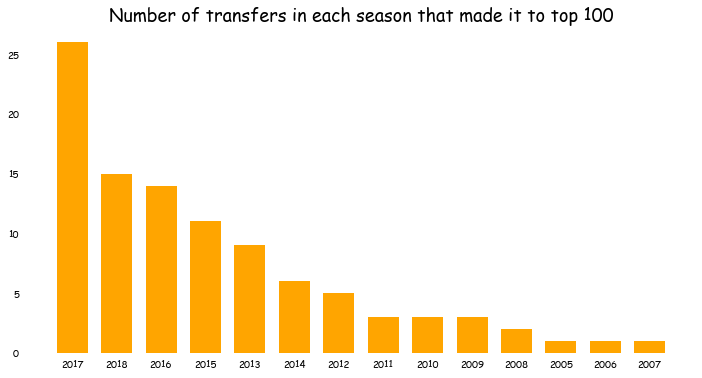

In [18]:
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
#or we could add fontname = 'Comic Sans MS' if we would like to do it separately

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(df_top["Season"], df_top["Count"], color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Number of transfers in each season that made it to top 100", fontsize=18)
ax.tick_params(bottom = False, left = False)


We can clearly see that the top each year tops up the previous as a rule.

P.S. The only reason why 2018 is lower than 2017 is simple because our dataset has been updated till August 1 of 2018 and as we all know, a good bunch of transfers happen at the last third of the transfer window, so most likely 2018 would top up 2017 by the end of the transfer window.

It's also interesting to see which league clubs are the "authors" of these top transfers and who are those who get the benefit.

Text(0, 0.5, 'Count')

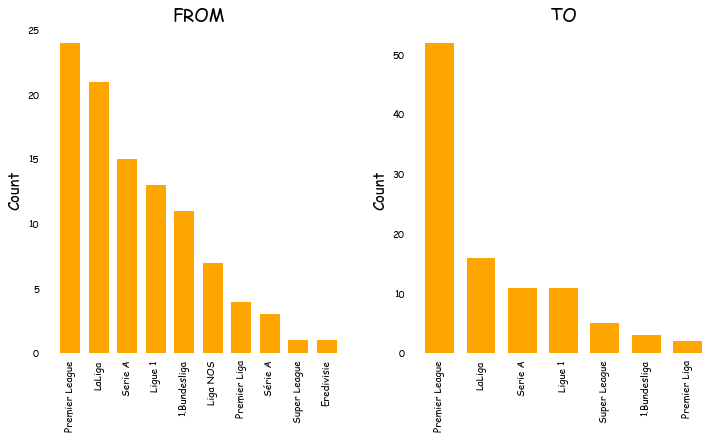

In [19]:
df_top_league_from = top_hundred_transfers["League_from"].value_counts().to_frame()
df_top_league_to = top_hundred_transfers["League_to"].value_counts().to_frame()

df_top_league_from.reset_index(level=0, inplace=True)
df_top_league_from.columns = ["League_from", "Count"]

df_top_league_to.reset_index(level=0, inplace=True)
df_top_league_to.columns = ["League_to", "Count"]

#now the visualization

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



ax1.bar(df_top_league_from["League_from"], df_top_league_from["Count"], color='orange', width=0.7)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title("FROM", fontsize=18)
ax1.set_xticklabels(df_top_league_from["League_from"], rotation=90)
ax1.tick_params(bottom = False, left = False)
ax1.set_ylabel("Count",fontsize=15)



ax2.bar(df_top_league_to["League_to"], df_top_league_to["Count"], color='orange', width=0.7)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_title("TO", fontsize=18)
ax2.set_xticklabels(df_top_league_to["League_to"], rotation=90)
ax2.tick_params(bottom = False, left = False)
ax2.set_ylabel("Count",fontsize=15)



As we can see in both cases Premier League has the most number of transfers. 

More than half of transfers of top 100 of these last 2 decades were done by Premier League clubs. 

Now, after we compared the counts, we can compare the sums as well. 

In [20]:
top_hundred_transfers_agg = top_hundred_transfers.groupby("League_to").agg({'Transfer_fee_mln':'sum'})

top_hundred_transfers_agg.reset_index(level=0, inplace=True)
top_hundred_transfers_agg.columns = ['League_to', 'Sum']

top_hundred_transfers_agg_sorted = top_hundred_transfers_agg.sort_values("Sum", ascending=False)

top_hundred_transfers_agg_sorted.head(10)

,League_to,Sum
3,Premier League,"2,672.18"
1,LaLiga,"1,156.42"
2,Ligue 1,786.00
5,Serie A,564.40
6,Super League,247.80
0,1.Bundesliga,124.50
4,Premier Liga,80.00


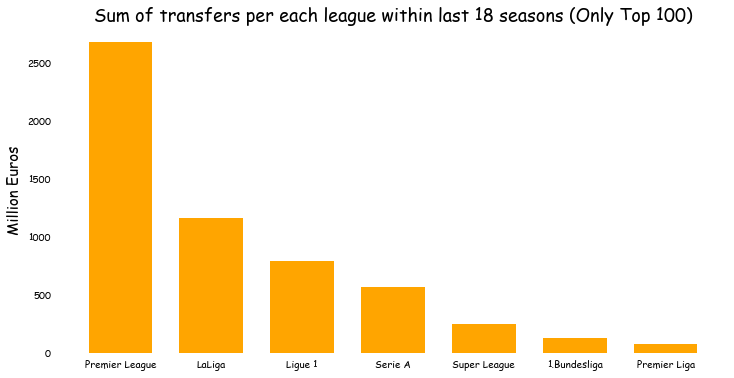

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(top_hundred_transfers_agg_sorted["League_to"], top_hundred_transfers_agg_sorted["Sum"], color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Sum of transfers per each league within last 18 seasons (Only Top 100)", fontsize=18)

ax.set_ylabel("Million Euros",fontsize=15)
ax.tick_params(bottom = False, left = False)

We see almost the same picture here. Premier league is the first in terms of sums as well having spent more than 2,5 billion (only considering the top 100 transfers dataframe).

## Now as we can see above our table is much cleaner, specificaly the last 3 columns got way better for visualizing. Now let's visualize the whole dataframe with all the rows.

We have 3286 transfers in total that took place between 2000 and 2018. Transfer fee ranges from 1,5 mln to 222 mln.

1) Visualize the distributions for both market value and transfer fee columns next to each other with histograms.

2) Comparing the total for each season with horizontal bars. And also the average for each season. 

3) Also make line chart with the seasons on the X axes to see the changes over time. 

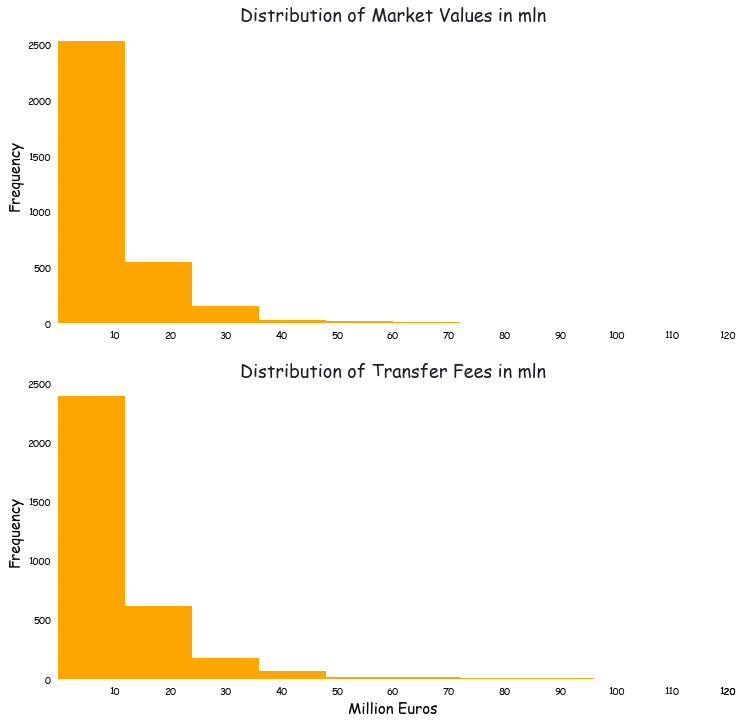

In [22]:
#Visualize the distributions for both market value and transfer fee columns next to each other with histograms.

dark_grey = (27/255,30/255,35/255)

fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(transfers["Market_value_mln"], bins = 10, range =(0,120), color='orange')
ax2.hist(transfers["Transfer_fee_mln"], bins = 10, range =(0,120), color='orange')

ax1.set_title("Distribution of Market Values in mln", fontsize=18, c=dark_grey)
ax2.set_title("Distribution of Transfer Fees in mln", fontsize=18, c=dark_grey)

ax1.set_xlim(0,120)
ax1.set_xticks([10,20,30,40,50,60,70,80,90,100,110,120])
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)
ax1.set_ylabel("Frequency",fontsize=15)
ax1.tick_params(bottom = False, left = False)

ax2.set_xlim(0,120)
ax2.set_xticks([10,20,30,40,50,60,70,80,90,100,110,120,120])
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)
ax2.set_xlabel("Million Euros",fontsize=15)
ax2.set_ylabel("Frequency",fontsize=15)
ax2.tick_params(bottom = False, left = False)

We can a see that the both graphs have positive skewness, also called left skewed, when the tail is on the right part of the graph.

In [23]:
#Comparing the total for each season with horizontal bars. And also the average for each season. 

sum_for_each_season = transfers.groupby("Season").agg({'Transfer_fee_mln':'sum'})

sum_for_each_season.reset_index(level=0, inplace=True)
sum_for_each_season.columns = ['Season', 'Sum']
sum_for_each_season = sum_for_each_season.sort_values('Sum', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
sum_for_each_season.reset_index(level=0, inplace=True)
sum_for_each_season = sum_for_each_season.drop(['index'], axis=1)

print("TOTAL FOR EACH SEASON")
display(sum_for_each_season.head(20))


mean_for_each_season = transfers.groupby("Season").agg({'Transfer_fee_mln':'mean'})

mean_for_each_season.reset_index(level=0, inplace=True)
mean_for_each_season.columns = ['Season', 'Mean']
mean_for_each_season = mean_for_each_season.sort_values('Mean', ascending=False)

#this next 2 lines are for first reseting the index so it starts from zero again, and delete the new added 'index' column.
mean_for_each_season.reset_index(level=0, inplace=True)
mean_for_each_season = mean_for_each_season.drop(['index'], axis=1)

print("AVERAGE FOR EACH SEASON")
display(mean_for_each_season.head(20))

TOTAL FOR EACH SEASON


,Season,Sum
0,2017,"4,672.14"
1,2016,"3,765.67"
2,2018,"3,369.67"
3,2015,"3,316.45"
4,2013,"2,832.92"
5,2014,"2,675.21"
6,2011,"2,115.08"
7,2009,"2,110.97"
8,2012,"2,097.48"
9,2008,"2,076.52"


AVERAGE FOR EACH SEASON


,Season,Mean
0,2017,19.80
1,2016,16.37
2,2018,14.40
3,2015,14.05
4,2013,11.71
5,2014,11.29
6,2007,8.97
7,2009,8.94
8,2012,8.85
9,2008,8.65


Text(0, 0.5, 'Million Euros')

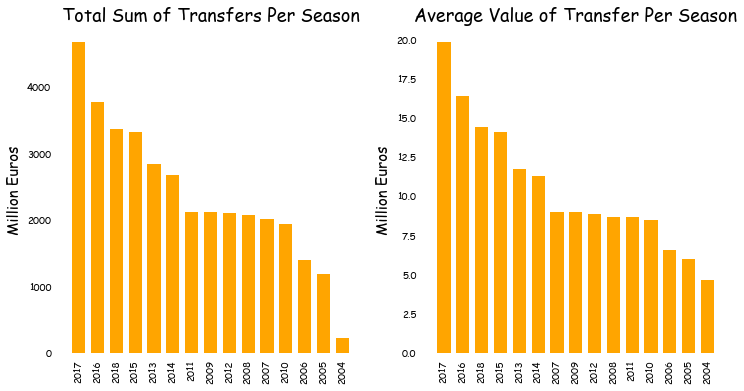

In [24]:
#Now let's visualize both tables with categorical values above and compare the seasons.

dark_grey = (27/255,30/255,35/255)

#now the visualization

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(sum_for_each_season["Season"], sum_for_each_season["Sum"], color='orange', width=0.7)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title("Total Sum of Transfers Per Season", fontsize=18)
ax1.set_xticklabels(sum_for_each_season["Season"], rotation=90)
ax1.tick_params(bottom = False, left = False)
ax1.set_ylabel("Million Euros",fontsize=15)


ax2.bar(mean_for_each_season["Season"], mean_for_each_season["Mean"], color='orange', width=0.7)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_title("Average Value of Transfer Per Season", fontsize=18)
ax2.set_xticklabels(mean_for_each_season["Season"], rotation=90)
ax2.tick_params(bottom = False, left = False)
ax2.set_ylabel("Million Euros",fontsize=15)


It's interesting to notice couple of things.

- There was a constant significant increase starting from 2015 to 2017 and probably the trend would continue in 2018 as well. The increase was apparent both for total and averague value of transfer.

- But that was not the case always before. Let's take a look at totals of the market throughout the time.For instance we can notice that the season 2013 was better than its following season of 2014. 2009 was better than 2012, 2007 was better than 2010.  
- Throughout 2007-2010 the average market value was pretty much consistent with an average of 10mln. 

- Throughout 2014-2017 it jumped from about 11mln to 20mln.

Now let's jump into visualizing it on the lince chart so we have a better understanding of the trend throught the time.

Text(0, 0.5, 'Million Euros')

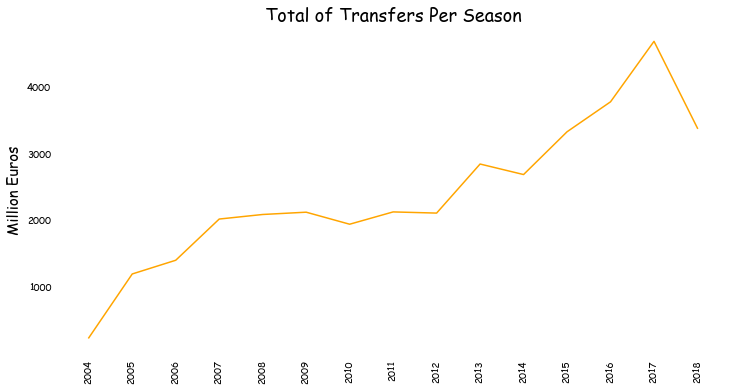

In [25]:
sum_for_each_season_sorted_by_season = sum_for_each_season.sort_values("Season")

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

ax.plot(sum_for_each_season_sorted_by_season["Season"], sum_for_each_season_sorted_by_season["Sum"], color='orange')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Total of Transfers Per Season", fontsize=18)
ax.set_xticklabels(sum_for_each_season_sorted_by_season["Season"], rotation=90)
ax.tick_params(bottom = False, left = False)
ax.set_ylabel("Million Euros",fontsize=15)


And here it's also clear that the increase throughout 2014-2017 has been significant and very sharp compared to the curve prior that that even had ups and downs. 

## Analyzing remaing "Age" and "Position" columns to see some other trends. 

In [26]:
display(top_hundred_transfers["Position"].value_counts())
top_hundred_transfers["Age"].value_counts(bins=2, normalize=True)

Centre-Forward        27
Right Winger          15
Attacking Midfield    13
Centre-Back           10
Left Winger           10
Central Midfield       9
Defensive Midfield     8
Goalkeeper             2
Right-Back             2
Second Striker         2
Right Midfield         1
Left-Back              1
Name: Position, dtype: int64

(17.983999999999998, 25.5]   0.64
(25.5, 33.0]                 0.36
Name: Age, dtype: float64

We can clearly see from the above value distributions that most of the players (about 65%) that made it to top 100 have more or less attacking positions, and also, that again, about 65% of them are younger than 25.

So we can conclude that young attacking players usually cost more.

But in real word, that's a big questions if they benefit the squad the most.

I would argue that 20-25 years old attacking players benefit the squad more than 25-30 years old defensive players.

But, in 2019-2020 there was a huge mental shift in that terms. Van Dijk, De Ligt were good examples that clubs now start to understand that defensive players are as much important than attacking players, and there is not any fair reason for their market price to be less on average. And as a result, the prices for defensive players with more or less decent level start to rise, especially good CBs are now really rare. And clubs like Liverpool or Man Utd would prefer to cash in 70-80 mln euros for a good young/midle aged CB rater than for a young talanted striker. Because it seems it became easier to grow effective attacking players in the club academies, which doesn't seem to be the case with defensive players.

In [27]:
display(transfers["Position"].value_counts())
transfers["Age"].value_counts(bins=3, normalize=True)

Centre-Forward        836
Centre-Back           468
Central Midfield      370
Attacking Midfield    304
Defensive Midfield    281
Right Winger          243
Left Winger           226
Left-Back             160
Right-Back            116
Goalkeeper            112
Second Striker        103
Left Midfield          44
Right Midfield         24
Name: Position, dtype: int64

(22.333, 28.667]   0.62
(15.98, 22.333]    0.28
(28.667, 35.0]     0.11
Name: Age, dtype: float64

The value distribution for the whole dataset is a little bit different. 

First we can see that out of 3287 transfers 468 have been centre-backs. But it's important no notice that it would be false to assume that in modern football the hardest positions that clubs always have struggles with filling with players from their academy is the centre back posotion. This number is mainly bigger than the RB and LB numbers simply because in the majority of today's tactics coaches always put 2 centre backs, basically twice more than LB or RB. While that's not completely the same with centre-forward position, cause a lot of tactics imply only one centre-forward, hence the number of 836 really suggests that that's the only position that stands out and is significantly higher than the others.

### Now let's visualize

In [28]:
transfers_three_age_groups = transfers["Age"].value_counts(bins=3, normalize=True).to_frame()

transfers_three_age_groups.head()

transfers_three_age_groups.reset_index(level=0, inplace=True)
transfers_three_age_groups.columns = ["Age_group", "Percentage"]

transfers_three_age_groups.head()

,Age_group,Percentage
0,"(22.333, 28.667]",0.62
1,"(15.98, 22.333]",0.28
2,"(28.667, 35.0]",0.11


In [29]:
transfers_three_age_groups["Percentage"] = transfers_three_age_groups["Percentage"] * 100
transfers_three_age_groups["Age_group"] = ["22-28","16-22", "28-35"]

transfers_three_age_groups.head()

,Age_group,Percentage
0,22-28,61.91
1,16-22,27.50
2,28-35,10.59


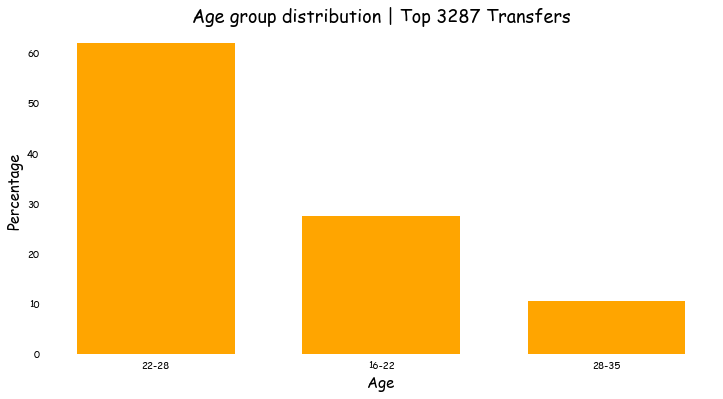

In [30]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(transfers_three_age_groups["Age_group"], transfers_three_age_groups["Percentage"], color='orange', width=0.7)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Age group distribution | Top 3287 Transfers", fontsize=18)

ax.set_ylabel("Percentage",fontsize=15)
ax.set_xlabel("Age",fontsize=15)
ax.tick_params(bottom = False, left = False)

# CONCLUSION HERE

Main conclusions would be.

- Throughout 2004-2017 there was a contanst sharp increase in total amount of money spent on trasfers, while prior to that the curve was not that sharp and has been even constant and sometimes had downs.
- Attacking positions and mainly centre-forward position are and have been higher in demand. 

Coming back to 2020, we can seafely say that this increasing trend continued, but there is one good and significant change. Nowadays CBs started to cost more and make to top transfer more frequently. Which can be a result of the above analysis, that for many years there was not much demand for CB, which maybe made younger generation and kids to desire more attacking positions and asa result a shortage of decent CB in the marketplace, hence the price got higher for them. 